In [1]:
# --- packages --- #
import numpy as np 
import pandas as pd
import os, sys, glob

import matplotlib.pyplot as plt
import matplotlib.colors as colors


from ctapipe_io_magic import MAGICEventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.io import EventSeeker, EventSource
from ctapipe.instrument import CameraGeometry
import astropy.units as u
import tables

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
# graphic parameters
aux.params()

# creating a folder to save the plots
pltpath = 'plots/3_events/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi = 200

In [2]:
source_name = 'Crab'

path_merged = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_merged_{source_name}.h5'
df_merged =  pd.read_hdf(path_merged, key='events/parameters')

path_mean   = f'/fefs/aswg/workspace/juan.jimenez/data/dl2/coincident/dl2_mean_{source_name}.h5'
df_mean   =  pd.read_hdf(path_mean,   key='events/parameters')

df_T1 = df_merged.query('tel_id == 1', inplace=False)
df_T2 = df_merged.query('tel_id == 2', inplace=False)
df_T3 = df_merged.query('tel_id == 3', inplace=False)

In [3]:
# this config done since ev80
# energy    = 3
# gammaness = 0.7 
# intensity = 400
# camera_dist = 0.3
# dist_impact = 100

energy    = 1
gammaness = 0.9
intensity = 900000
camera_dist = 0.3
dist_impact = 100


mask_eg   = f'reco_energy > {energy} and gammaness > {gammaness} '
mask_cent = f'and x > -{camera_dist} and x < {camera_dist} and y > -{camera_dist} and y < {camera_dist}' 
mask_impact = f'and core_x > -{dist_impact} and core_x < {dist_impact} and core_y > -{dist_impact} and core_y< {dist_impact}'


# ############################
# df_mean.reset_index(inplace=True)
# df_mean.query(mask_eg, inplace=True)
# ############################


#######################333
df_T1.query(f'intensity > {intensity} and obs_id == 7198', inplace=True)
df_mean.query(f'reco_energy > {energy}',inplace=True)
##########################

total_ids1 = df_T1['total_id']
total_ids2 = df_mean['total_id']
total_ids  =  set(total_ids1) & set(total_ids2)


df_T1.reset_index(inplace=True)
df_T2.reset_index(inplace=True)
df_T3.reset_index(inplace=True)
df_mean.reset_index(inplace=True)



df_T1.query(f'total_id in @total_ids', inplace=True)
df_T2.query(f'total_id in @total_ids', inplace=True)
df_T3.query(f'total_id in @total_ids', inplace=True)
df_mean.query(f'total_id in @total_ids', inplace=True)

# df_evs = df_T1.sort_values('obs_id', inplace=True)

up, do = (0, 4)
df_T1 = df_T1[up:do]
df_T2 = df_T2[up:do]
df_T3 = df_T3[up:do]
df_mean = df_mean[up:do]

(df_T1)

/tmp/ipykernel_7764/1119747734.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T1.query(f'intensity > {intensity} and obs_id == 7198', inplace=True)
/tmp/ipykernel_7764/1119747734.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T1.query(f'total_id in @total_ids', inplace=True)
/tmp/ipykernel_7764/1119747734.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T2.query(f'total_id in @total_ids', inplace=True)
/tmp/ipy

,obs_id,event_id,tel_id,obs_id_magic,event_id_magic,obs_id_lst,event_id_lst,intensity,x,y,r,phi,length,length_uncertainty,width,width_uncertainty,psi,skewness,kurtosis,slope,intercept,intensity_width_1,intensity_width_2,pixels_width_1,pixels_width_2,n_pixels,n_islands,pointing_alt,pointing_az,timestamp,time_diff,multiplicity,combo_type,alt,alt_uncert,az,az_uncert,core_x,core_y,impact,h_max,reco_energy,reco_energy_var,reco_disp,reco_disp_var,reco_alt,reco_az,disp_diff_sum,disp_diff_mean,gammaness,gammaness_var,total_id,magic_id,pointing_zd,reco_zd
0,7198,479744,1,5101129,21231,7198.0,479744.0,9.682817e+05,-0.383684,-0.496409,0.627404,-127.701085,0.295409,0.000348,0.153765,0.000271,30.401007,0.214172,2.287184,-6.362733,27.886890,0.047263,0.094068,0.012399,0.024798,490,3,1.237743,4.444749,1.646256e+09,0.000069,3,3,71.576941,1.049241,254.153891,1.049241,-110.456056,156.642856,125.541011,4816.573582,34.465139,0.040362,1.550391,0.225703,71.468187,253.937800,2.076088,0.692029,0.087167,0.079569,7198.479744,5101129.21231,-88.762257,-18.531813
1,7198,2594496,1,5101129,65249,7198.0,2594496.0,1.057849e+06,0.744612,-0.069192,0.747820,-5.308855,0.392022,0.000556,0.266249,0.000387,68.624315,-0.682404,3.032525,-1.877772,17.759746,0.115377,0.244196,0.035580,0.071698,852,1,1.220769,4.466912,1.646257e+09,0.000165,3,3,71.886419,0.386043,259.266898,0.386043,-41.354772,81.088262,33.422912,3503.415782,28.055651,0.048898,1.021112,0.127451,71.823338,258.530522,1.126688,0.375563,0.233667,0.179067,7198.2594496,5101129.65249,-88.779231,-18.176662
2,7198,3925981,1,5101129,93376,7198.0,3925981.0,1.331428e+06,-0.019948,0.678245,0.678539,91.684649,0.285244,0.000348,0.254646,0.000321,-25.659057,0.241015,2.897479,-0.097108,17.433605,0.055334,0.119577,0.026954,0.053908,795,2,1.209889,4.480202,1.646257e+09,0.000183,3,3,68.895040,0.522816,260.983232,0.522816,-12.962568,-69.608852,137.061930,6570.007196,37.431866,0.040320,1.121013,0.111244,68.193047,261.744369,2.689547,0.896516,0.133167,0.115433,7198.3925981,5101129.93376,-88.790111,-21.806953
3,7198,4593744,1,5101129,111784,7198.0,4593744.0,1.269811e+06,0.403136,0.214688,0.456738,28.037303,0.372518,0.000359,0.176315,0.000442,73.362918,0.157073,2.125126,4.459752,27.386860,0.020222,0.044349,0.013477,0.028032,655,6,1.202850,4.488447,1.646257e+09,0.000029,3,3,69.263093,0.024846,254.136625,0.024846,127.761468,65.688714,135.170979,5659.843225,38.110587,0.034084,1.500521,0.240510,69.290375,254.344805,0.896202,0.298734,0.180917,0.148186,7198.4593744,5101129.111784,-88.797150,-20.709625


In [4]:
run_m      = df_T1['obs_id_magic'].to_numpy()
run_l      = df_T1['obs_id'].to_numpy()
event_id_m = df_T1['event_id_magic'].to_numpy()
event_id_l = df_T1['event_id'].to_numpy()

energ  = df_mean['reco_energy'].to_numpy()
gamma  = df_mean['gammaness'].to_numpy()

x      = [df['x'].to_numpy()               for df in [df_T1, df_T2, df_T3]]
y      = [df['y'].to_numpy()               for df in [df_T1, df_T2, df_T3]]
width  = [df['width'].to_numpy()           for df in [df_T1, df_T2, df_T3]]
length = [df['length'].to_numpy()          for df in [df_T1, df_T2, df_T3]]
angle  = [np.deg2rad(df['psi'].to_numpy()) for df in [df_T1, df_T2, df_T3]]

In [5]:
def find_firstev_srun_magic(files):
    events_srun = []
    for i, srun in enumerate(files):
        event_source = MAGICEventSource(input_url=srun, process_run=False, max_events=1)
        seeker       = EventSeeker(event_source=event_source)
        event        = seeker.get_event_index(0)
        events_srun.append(event.index.event_id)    
    return events_srun

def find_subrun(ev_id, events_srun):
    srun_index = None
    for i in range(len(events_srun)-1):
        if ev_id >= events_srun[i] and ev_id < events_srun[i+1]:
            srun_index = i
    if srun_index == None:
        if ev_id > events_srun[-1]:
            srun_index = range(len(events_srun))[-1]
    return srun_index

## Finding the correspondent subruns

In [6]:
%%time

abs_run_m = sorted(np.unique(run_m))

abs_files_m1, abs_files_m2 = [], []
for i, run in enumerate(abs_run_m):
    abs_files_m1.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    abs_files_m2.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M2/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    
files_m1, files_m2 = [], []    
for i, run in enumerate(run_m):
    files_m1.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/*/*/*/*{run}.*_Y_*.root')))
    files_m2.append(sorted(glob.glob(f'/fefs/onsite/common/MAGIC/data/M2/event/Calibrated/*/*/*/*{run}.*_Y_*.root'))) 
    
events_srun_m1, events_srun_m2 = [], [] 
for i, run in enumerate(abs_run_m):
    print(f'Reading... {i} of {len(abs_run_m)} --> {i/len(abs_run_m)*100:.1f}%')
    events_srun_m1.append(find_firstev_srun_magic(abs_files_m1[i]))
    events_srun_m2.append(find_firstev_srun_magic(abs_files_m2[i]))
    
srun_m1, srun_m2 = [], []    
for i, ev in enumerate(event_id_m): 
    
    index = np.where(abs_run_m == run_m[i])[0][0]
    events_srun1 = events_srun_m1[index]
    events_srun2 = events_srun_m2[index]
    
    srun_m1.append(find_subrun(event_id_m[i], events_srun1))
    srun_m2.append(find_subrun(event_id_m[i], events_srun2))
    
srun_l = event_id_l//53000

Reading... 0 of 1 --> 0.0%


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive 

CPU times: user 58.9 s, sys: 8.39 s, total: 1min 7s
Wall time: 1min 54s


## Finding filenames

In [7]:
file_m1 = np.array([files_m1[i][srun_m1[i]] for i in range(len(files_m1))])
file_m2 = np.array([files_m2[i][srun_m2[i]] for i in range(len(files_m2))])

file_l = [glob.glob(f'/fefs/aswg/data/real/DL1/*/*/tailcut84/dl1*{run:05.0f}.{srun_l[i]:04.0f}.h5')[0] for i, run in enumerate(run_l)]

## Extracting LST images

In [8]:
%%time

image_l = []
for i in range(len(file_l)):

    try:
        table = tables.open_file(file_l[i])
        event_index = np.where(table.root.dl1.event.telescope.image.LST_LSTCam.col('event_id')==event_id_l[i])[0][0]
        image_l.append(table.root.dl1.event.telescope.image.LST_LSTCam.col('image')[event_index])
        
    except:
        fl = file_l[i].replace(f'{srun_l[i]:04.0f}', f'{srun_l[i]-1:04.0f}')
        
        table = tables.open_file(fl)
        event_index = np.where(table.root.dl1.event.telescope.image.LST_LSTCam.col('event_id')==event_id_l[i])[0][0]
        image_l.append(table.root.dl1.event.telescope.image.LST_LSTCam.col('image')[event_index])

CPU times: user 15 s, sys: 6.15 s, total: 21.2 s
Wall time: 38.8 s


## Extracting MAGIC images

In [9]:
%%time

image_m1, image_m2 = [], []

for i in range(len(file_m1)):
    
    print(f'{i} of {len(file_m1)} -{run_m[i]}-{event_id_m[i]}\n-->{file_m1[i]}')
    
    event_source1 = MAGICEventSource(input_url=file_m1[i], process_run=False,)
    event_source2 = MAGICEventSource(input_url=file_m2[i], process_run=False,)

    seeker1 = EventSeeker(event_source=event_source1)
    seeker2 = EventSeeker(event_source=event_source2)

    event1 = seeker1.get_event_id(event_id_m[i])
    event2 = seeker2.get_event_id(event_id_m[i])
    
    image_m1.append(event1.dl1.tel[1].image)
    image_m2.append(event2.dl1.tel[2].image)
    

0 of 4 -5101129-21231
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2022/03/03/20220303_M1_05101129.002_Y_CrabNebula-W0.40+035.root


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 93 drive reports.
Drive reports available from 2022-03-02 21:23:50.957 to 2022-03-02 21:36:31.277.


1 of 4 -5101129-65249
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2022/03/03/20220303_M1_05101129.005_Y_CrabNebula-W0.40+035.root


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 93 drive reports.
Drive reports available from 2022-03-02 21:23:50.957 to 2022-03-02 21:36:31.277.


2 of 4 -5101129-93376
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2022/03/03/20220303_M1_05101129.008_Y_CrabNebula-W0.40+035.root


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 93 drive reports.
Drive reports available from 2022-03-02 21:23:50.957 to 2022-03-02 21:36:31.277.


3 of 4 -5101129-111784
-->/fefs/onsite/common/MAGIC/data/M1/event/Calibrated/2022/03/03/20220303_M1_05101129.009_Y_CrabNebula-W0.40+035.root


Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 91 drive reports.
Drive reports available from 2022-03-02 21:23:51.043 to 2022-03-02 21:36:31.104.
Seeking event by iterating through events.. (potentially long process)
Interpolating cosmic events information from 93 drive reports.
Drive reports available from 2022-03-02 21:23:50.957 to 2022-03-02 21:36:31.277.


CPU times: user 1min 1s, sys: 3.31 s, total: 1min 4s
Wall time: 1min 4s


## Extract camera geometries

## Change camera geometries

In [10]:
event_source1 = MAGICEventSource(input_url=file_m1[0], process_run=False,)
event_source2 = MAGICEventSource(input_url=file_m2[0], process_run=False,)

subarray1 = event_source1.subarray
subarray2 = event_source2.subarray

camera_geometry_m1 = subarray1.tel[1].camera.geometry
camera_geometry_m2 = subarray2.tel[2].camera.geometry

# reading camera geometries
camera_geometry_l = CameraGeometry.from_name('LSTCam', version=2)

# modifying them
tel_x, tel_y = np.array([-77.13, 62.55, 14.57]), np.array([-8.09, 39.30, -31.21])
tel_x, tel_y = tel_x, tel_y

xm1 = camera_geometry_m1.pix_x
ym1 = camera_geometry_m1.pix_y
xm2 = camera_geometry_m2.pix_x
ym2 = camera_geometry_m2.pix_y
xl = camera_geometry_l.pix_x
yl = camera_geometry_l.pix_y

camera_geometry_m1.pix_x, camera_geometry_m1.pix_y = xm1 + tel_x[1]*u.m, ym1 + tel_y[1]*u.m
camera_geometry_m2.pix_x, camera_geometry_m2.pix_y = xm2 + tel_x[2]*u.m, ym2 + tel_y[2]*u.m

camera_geometry_l.pix_x, camera_geometry_l.pix_y = -yl + tel_x[0]*u.m, -xl + tel_y[0]*u.m

camera_geometry_l.pix_rotation = camera_geometry_l.pix_rotation*2
camera_geometry_m1.pix_rotation = camera_geometry_m1.pix_rotation
camera_geometry_m2.pix_rotation = camera_geometry_m2.pix_rotation

## Plot it

0 of 4


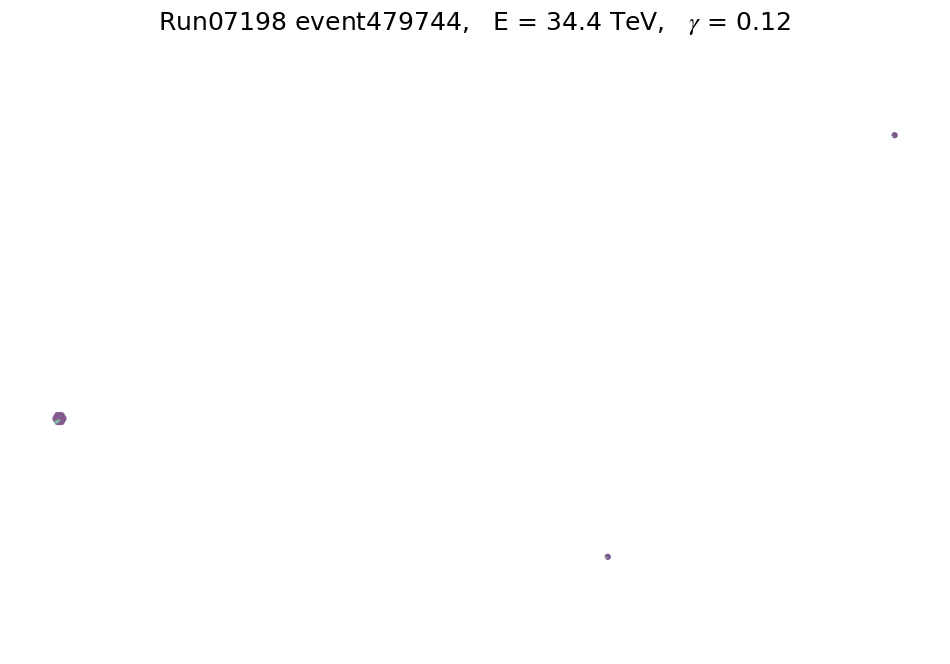

1 of 4


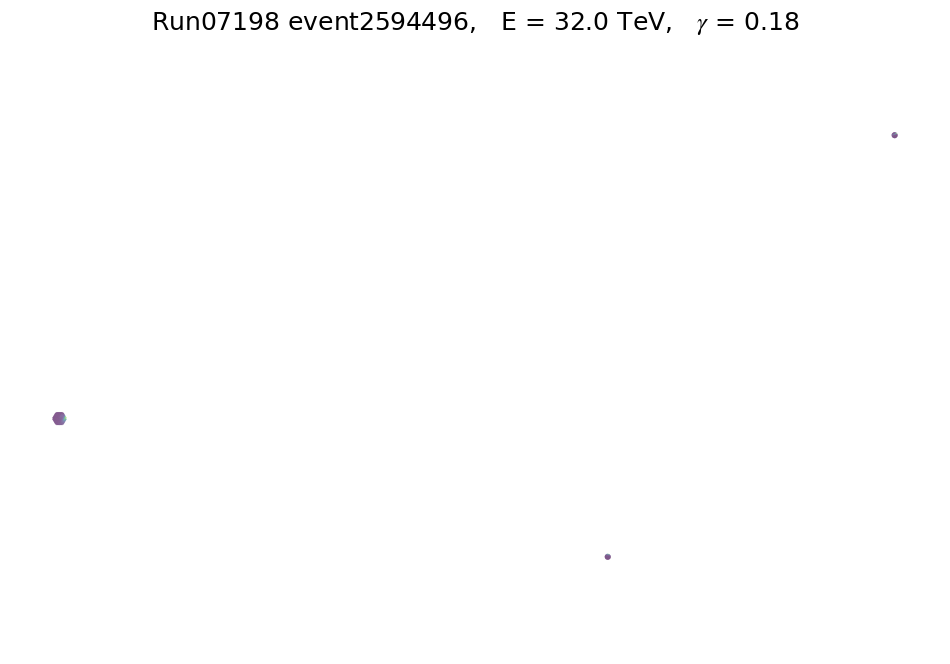

2 of 4


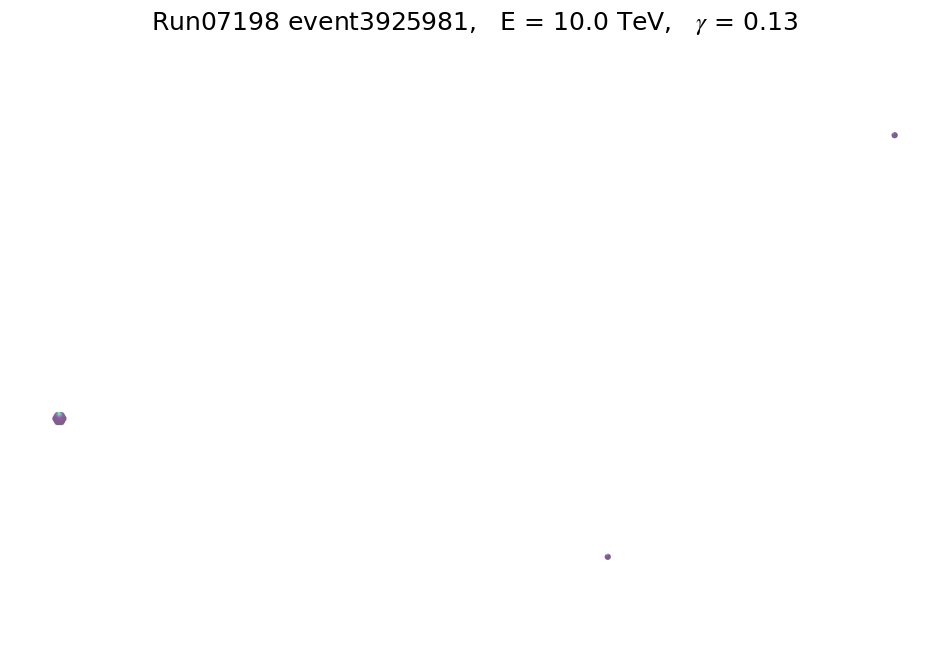

3 of 4


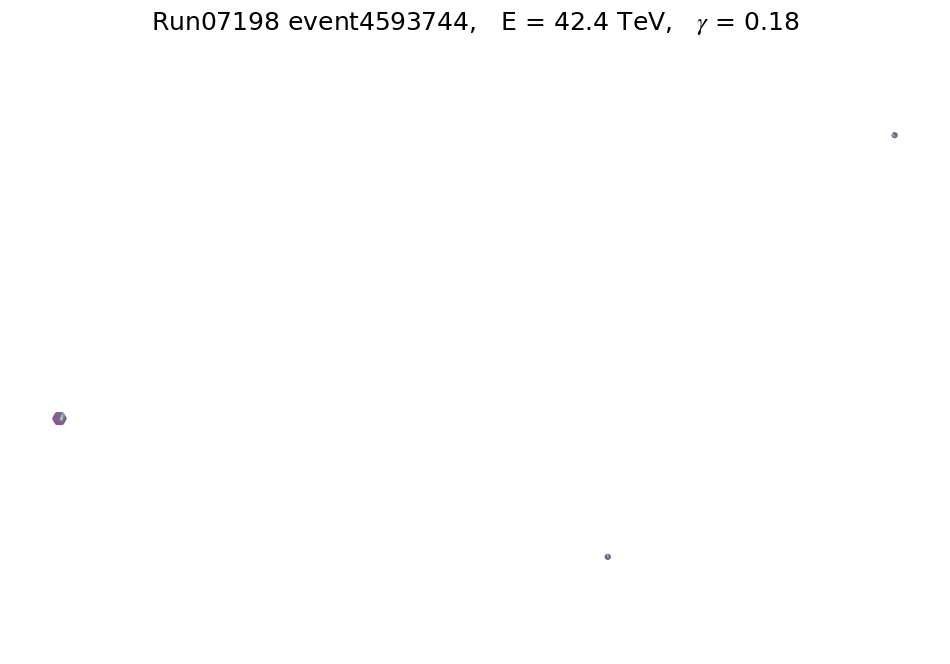

In [11]:
for j in range(len(event_id_l)):

    print(f'{j} of {len(event_id_l)}')
    fig, ax = plt.subplots(figsize=(12, 8))

    disp1 = CameraDisplay(camera_geometry_l, ax=ax, show_frame=False)
    disp2 = CameraDisplay(camera_geometry_m1, ax=ax, show_frame=False)
    disp3 = CameraDisplay(camera_geometry_m2,  ax=ax, show_frame=False)

    # disp1.add_colorbar()
    # disp2.add_colorbar(label="pixel charge")

    disp1.image = image_l[j]
    disp2.image = image_m1[j]
    disp3.image = image_m2[j]

    ax.set_title(f"Run{run_l[i]:05.0f} event{event_id_l[j]},   E = {energ[j]:.1f} TeV,   $\gamma$ = {gamma[j]:.2f}")
    # ax2.set_title('MAGIC-I')
    # ax4.set_title('MAGIC-II')
    # ax3.set_title('LST-1')
    # for ax in [ax1, ax2]:
    # ax.set_xlim(-80, 64)
    # ax.set_ylim(-34, 41)
    # for ax in [ax1, ax2, ax3, ax4]:
    ax.axis('off')


    plt.savefig(f'{pltpath}Run{run_l[j]:05.0f}.ev{event_id_l[j]}.png', bbox_inches='tight', dpi=dpi)
    plt.show()

## Other geometry

In [12]:
event_source1 = MAGICEventSource(input_url=file_m1[0], process_run=False,)
event_source2 = MAGICEventSource(input_url=file_m2[0], process_run=False,)

subarray1 = event_source1.subarray
subarray2 = event_source2.subarray

camera_geometry_m1 = subarray1.tel[1].camera.geometry
camera_geometry_m2 = subarray2.tel[2].camera.geometry

# reading camera geometries
camera_geometry_l  = CameraGeometry.from_name('LSTCam', version=2)

# modifying them
tel_x, tel_y = np.array([-77.13, 62.55, 14.57]), np.array([-8.09, 39.30, -31.21])
tel_x, tel_y = tel_x/50*0, tel_y/50*0

xm1 = camera_geometry_m1.pix_x
ym1 = camera_geometry_m1.pix_y
xm2 = camera_geometry_m2.pix_x
ym2 = camera_geometry_m2.pix_y
xl = camera_geometry_l.pix_x
yl = camera_geometry_l.pix_y

camera_geometry_m1.pix_x, camera_geometry_m1.pix_y = -ym1 + tel_x[1]*u.m, -xm1 + tel_y[1]*u.m
camera_geometry_m2.pix_x, camera_geometry_m2.pix_y = -ym2 + tel_x[2]*u.m, -xm2 + tel_y[2]*u.m

camera_geometry_l.pix_x, camera_geometry_l.pix_y = xl  + tel_x[0]*u.m, yl  + tel_y[0]*u.m

camera_geometry_l.pix_rotation = camera_geometry_l.pix_rotation
camera_geometry_m1.pix_rotation = camera_geometry_m1.pix_rotation*1.96
camera_geometry_m2.pix_rotation = camera_geometry_m2.pix_rotation*1.96

3 of 4


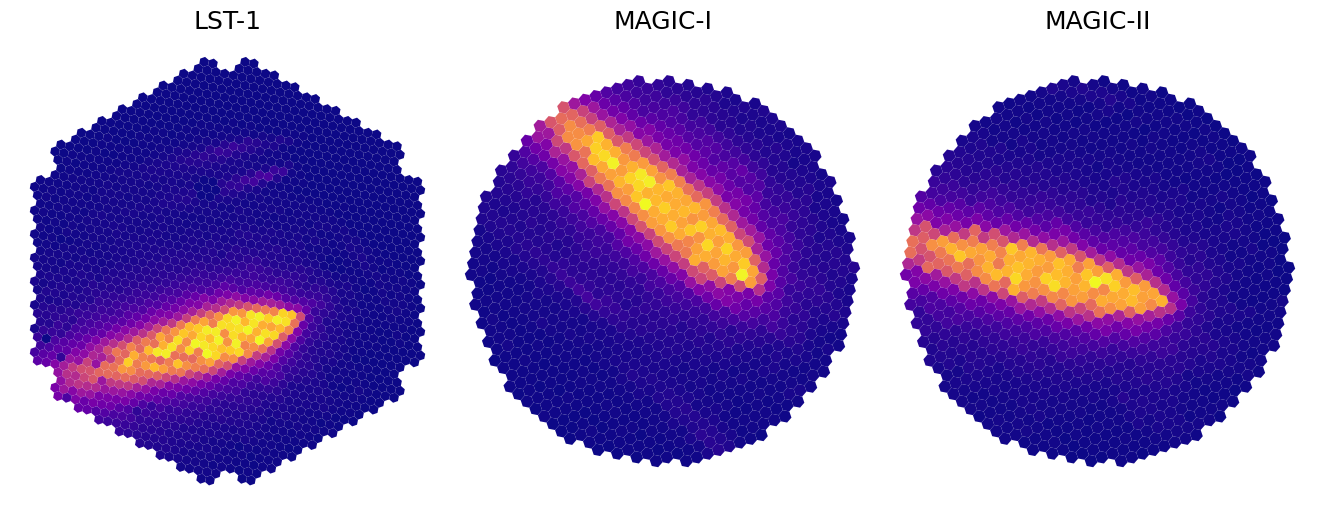

In [13]:
cmap='plasma'

j = 3

print(f'{j} of {len(event_id_l)}')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13.5, 5.4))

disp1 = CameraDisplay(camera_geometry_l, ax=ax1, show_frame=False, cmap=cmap)
disp2 = CameraDisplay(camera_geometry_m1, ax=ax2, show_frame=False, cmap=cmap)
disp3 = CameraDisplay(camera_geometry_m2,  ax=ax3, show_frame=False, cmap=cmap)

# disp1.add_colorbar()
# disp2.add_colorbar(label="pixel charge")

disp1.image = image_l[j]
disp2.image = image_m1[j]
disp3.image = image_m2[j]

# disp1.add_ellipse(centroid=(x[0][j], y[0][j]), width=width[0][j], length=length[0][j], angle=angle[0][j], color='w')
# disp2.add_ellipse(centroid=(-y[1][j], -x[1][j]), width=width[1][j], length=length[1][j], angle=angle[1][j]+np.pi/2, color='w')
# disp3.add_ellipse(centroid=(-y[2][j], -x[2][j]), width=width[2][j], length=length[2][j], angle=angle[2][j]+np.pi/2, color='w')


ax.set_title(f"Run{run_l[i]:05.0f} event{event_id_l[j]},   E = {energ[j]:.1f} TeV,   $\gamma$ = {gamma[j]:.2f}")
ax2.set_title('MAGIC-I')
ax3.set_title('MAGIC-II')
ax1.set_title('LST-1')

# ax1.set_ylim(-1.25, 1.25)
# ax1.set_xlim(-1, 1)

for ax in [ax1, ax2, ax3]:
    ax.axis('off')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(f'{pltpath}total-Run{run_l[j]:05.0f}.ev{event_id_l[j]}.png', bbox_inches='tight', dpi=200)

# plt.savefig(f'{pltpath}test.pdf', bbox_inches='tight', dpi=300)
plt.show()